In [4]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data_path = 'C:/Users/hamis/Desktop/ML/NCS 数据专家 笔试/PreScreen_r3_pw - 1234/PreScreen_r3/palm_ffb.csv'
palm_ffb_data = read_csv(data_path, header = 0)

In [3]:
palm_ffb_data

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [108]:
palm_ffb_data.corr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [303]:
###step 1: data convertion

palm_ffb_data_clean = palm_ffb_data[['FFB_Yield','SoilMoisture', 'Average_Temp', 'Min_Temp','Max_Temp','Precipitation','Working_days']].copy()

###max(palm_ffb_data_clean['HA_Harvested']), min(palm_ffb_data_clean['HA_Harvested'])
###HA_Harvested/1000 to make it keep the similiar volumn compared with other column
palm_ffb_data_clean['HA_Harvested_adj'] = palm_ffb_data['HA_Harvested']/1000

###calculate max_temp - min_temp
palm_ffb_data_clean['temp_range'] = palm_ffb_data['Max_Temp'] - palm_ffb_data['Min_Temp']

###transfer date to month
month = []
for i in range(len(palm_ffb_data)):
    month.append(int(palm_ffb_data['Date'][i][3:5]))
#palm_ffb_data_clean['month'] = month    
for m in range(1,13):
    palm_ffb_data_clean['month_{m}'.format(m=m)] = (pd.Series(month) == m).astype(int)
    
#palm_ffb_data_clean 

In [304]:
###aggregation features: variance, avg of SoilMoisture, avg_temp, max-min temp, Precipitation, HA_Harvested within recent n months
def cal_agg_feature(input_feature, agg_num, output_type):
    input_feature = list(input_feature)
    
    if output_type == 'avg':
        aggregation_avg = []
        for i in range(len(input_feature)):
            aggregation_avg.append(np.mean(input_feature[max(0,i-agg_num+1):i+1]))
        output_agg_feature = aggregation_avg
    
    if output_type == 'std':
        aggregation_std = []
        for i in range(len(input_feature)):
            aggregation_std.append(np.std(input_feature[max(0,i-agg_num+1):i+1]))
        output_agg_feature = aggregation_std
        
    return output_agg_feature

In [305]:
##SoilMoisture agg feature
palm_ffb_data_clean['SoilMoisture_avg_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 3, output_type = 'avg')
palm_ffb_data_clean['SoilMoisture_avg_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 6, output_type = 'avg')
palm_ffb_data_clean['SoilMoisture_avg_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 9, output_type = 'avg')
palm_ffb_data_clean['SoilMoisture_avg_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 12, output_type = 'avg')

palm_ffb_data_clean['SoilMoisture_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['SoilMoisture_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['SoilMoisture_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['SoilMoisture_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['SoilMoisture'], agg_num = 12, output_type = 'std')

In [306]:
##Average_Temp agg feature
palm_ffb_data_clean['Average_Temp_avg_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 3, output_type = 'avg')
palm_ffb_data_clean['Average_Temp_avg_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 6, output_type = 'avg')
palm_ffb_data_clean['Average_Temp_avg_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 9, output_type = 'avg')
palm_ffb_data_clean['Average_Temp_avg_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 12, output_type = 'avg')

palm_ffb_data_clean['Average_Temp_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['Average_Temp_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['Average_Temp_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['Average_Temp_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Average_Temp'], agg_num = 12, output_type = 'std')

In [307]:
### variance of temp

palm_ffb_data_clean['Min_Temp_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Min_Temp'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['Min_Temp_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Min_Temp'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['Min_Temp_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Min_Temp'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['Min_Temp_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Min_Temp'], agg_num = 12, output_type = 'std')

palm_ffb_data_clean['Max_Temp_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Max_Temp'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['Max_Temp_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Max_Temp'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['Max_Temp_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Max_Temp'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['Max_Temp_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Max_Temp'], agg_num = 12, output_type = 'std')

In [308]:
##Precipitation agg feature
palm_ffb_data_clean['Precipitation_avg_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 3, output_type = 'avg')
palm_ffb_data_clean['Precipitation_avg_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 6, output_type = 'avg')
palm_ffb_data_clean['Precipitation_avg_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 9, output_type = 'avg')
palm_ffb_data_clean['Precipitation_avg_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 12, output_type = 'avg')

palm_ffb_data_clean['Precipitation_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['Precipitation_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['Precipitation_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['Precipitation_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['Precipitation'], agg_num = 12, output_type = 'std')

In [309]:
##HA_Harvested_adj agg feature
palm_ffb_data_clean['HA_Harvested_adj_avg_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 3, output_type = 'avg')
palm_ffb_data_clean['HA_Harvested_adj_avg_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 6, output_type = 'avg')
palm_ffb_data_clean['HA_Harvested_adj_avg_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 9, output_type = 'avg')
palm_ffb_data_clean['HA_Harvested_adj_avg_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 12, output_type = 'avg')

palm_ffb_data_clean['HA_Harvested_adj_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['HA_Harvested_adj_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['HA_Harvested_adj_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['HA_Harvested_adj_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['HA_Harvested_adj'], agg_num = 12, output_type = 'std')

In [310]:
##temp_range agg feature
palm_ffb_data_clean['temp_range_avg_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 3, output_type = 'avg')
palm_ffb_data_clean['temp_range_avg_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 6, output_type = 'avg')
palm_ffb_data_clean['temp_range_avg_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 9, output_type = 'avg')
palm_ffb_data_clean['temp_range_avg_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 12, output_type = 'avg')

palm_ffb_data_clean['temp_range_std_3m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 3, output_type = 'std')
palm_ffb_data_clean['temp_range_std_6m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 6, output_type = 'std')
palm_ffb_data_clean['temp_range_std_9m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 9, output_type = 'std')
palm_ffb_data_clean['temp_range_std_12m_agg'] = cal_agg_feature(palm_ffb_data_clean['temp_range'], agg_num = 12, output_type = 'std')

In [311]:
#palm_ffb_data_clean.columns

# Model

In [346]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [347]:
#palm_ffb_data_clean = palm_ffb_data_clean[12:]

In [348]:
Y = palm_ffb_data_clean['FFB_Yield']
X = palm_ffb_data_clean.iloc[:,1:]

##first use Lasso to select features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 111)
regr = linear_model.LinearRegression()
lassp_model = Lasso(alpha = 1, precompute = True, tol = 1e-7)
lassp_model.fit(X_train, y_train)
#lassp_model.score(X_test, y_test)

Lasso(alpha=1, precompute=True, tol=1e-07)

In [349]:
#lassp_model.coef_ != 0
len(X.columns)

68

In [350]:
##keep the significant features
kept_col = list(X.columns[lassp_model.coef_ != 0])

In [351]:
###check the correlation among kept features and target
kept_col_with_Y  = kept_col.copy()
kept_col_with_Y.append('FFB_Yield')
palm_ffb_data_clean[kept_col_with_Y].corr()

,Precipitation,HA_Harvested_adj,SoilMoisture_avg_3m_agg,SoilMoisture_avg_6m_agg,SoilMoisture_avg_12m_agg,SoilMoisture_std_9m_agg,Precipitation_std_3m_agg,HA_Harvested_adj_avg_6m_agg,FFB_Yield
Precipitation,1.000000,-0.265866,0.181168,0.030824,0.100434,-0.136439,-0.198754,0.029017,0.289604
HA_Harvested_adj,-0.265866,1.000000,-0.169212,0.135907,0.089257,0.161075,-0.097990,0.416340,-0.350222
SoilMoisture_avg_3m_agg,0.181168,-0.169212,1.000000,0.804193,0.573177,-0.518976,0.360114,-0.218045,-0.245989
SoilMoisture_avg_6m_agg,0.030824,0.135907,0.804193,1.000000,0.755056,-0.567474,0.299529,-0.163642,-0.365420
SoilMoisture_avg_12m_agg,0.100434,0.089257,0.573177,0.755056,1.000000,-0.706827,0.057686,0.167247,0.081881
SoilMoisture_std_9m_agg,-0.136439,0.161075,-0.518976,-0.567474,-0.706827,1.000000,-0.056919,-0.060182,-0.170882
Precipitation_std_3m_agg,-0.198754,-0.097990,0.360114,0.299529,0.057686,-0.056919,1.000000,-0.332607,-0.383424
HA_Harvested_adj_avg_6m_agg,0.029017,0.416340,-0.218045,-0.163642,0.167247,-0.060182,-0.332607,1.000000,0.401846
FFB_Yield,0.289604,-0.350222,-0.245989,-0.365420,0.081881,-0.170882,-0.383424,0.401846,1.000000


In [358]:
X_kept = palm_ffb_data_clean[kept_col]
X_kept_train, X_kept_test, y_kept_train, y_kept_test = train_test_split(X_kept, Y, test_size = 0.3, random_state = 111)
regr.fit(X_kept_train, y_kept_train)
y_pred = regr.predict(X_kept_test)
# 查看系数
print('Coefficients: \n', regr.coef_)
# 查看均方误差
print("Mean squared error: %.2f"
      % mean_squared_error(y_kept_test, y_pred))
# 解释方差分数:1是完美的预测
print('Variance score: %.2f' % r2_score(y_kept_test, y_pred))

Coefficients: 
 [ 0.00061685 -0.00335739 -0.00069128 -0.00317621  0.00305382 -0.00428003
 -0.00128431  0.00322472]
Mean squared error: 0.03
Variance score: 0.50


Text(0, 0.5, '预测值')

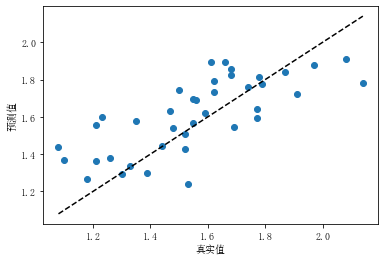

In [319]:
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.scatter(y_kept_test, y_pred)
plt.plot([y_kept_test.min(),y_kept_test.max()], [y_kept_test.min(),y_kept_test.max()], 'k--')
plt.xlabel('真实值')
plt.ylabel('预测值')

In [321]:
from pandas.core.frame import DataFrame
model_result = DataFrame(regr.coef_, kept_col)
model_result.rename(columns={0:'coef'},inplace=True)
model_result

,coef
Precipitation,0.000617
HA_Harvested_adj,-0.003357
SoilMoisture_avg_3m_agg,-0.000691
SoilMoisture_avg_6m_agg,-0.003176
SoilMoisture_avg_12m_agg,0.003054
SoilMoisture_std_9m_agg,-0.004280
Precipitation_std_3m_agg,-0.001284
HA_Harvested_adj_avg_6m_agg,0.003225


In [ ]:
####vif

In [360]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_kept.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_kept.values, i)
                          for i in range(len(X_kept.columns))]

print(vif_data)

                       feature          VIF
0                Precipitation     8.105733
1             HA_Harvested_adj  1107.321703
2      SoilMoisture_avg_3m_agg   430.497045
3      SoilMoisture_avg_6m_agg  1177.858416
4     SoilMoisture_avg_12m_agg  1139.097686
5      SoilMoisture_std_9m_agg    15.570609
6     Precipitation_std_3m_agg     4.184255
7  HA_Harvested_adj_avg_6m_agg  1301.182846


# Using Original Data

In [332]:
X

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222
...,...,...,...,...,...,...,...
125,498.2,27.213333,21.6,33.6,165.6,24,820758.9147
126,494.7,27.074194,21.2,33.5,154.7,26,882254.2254
127,478.8,27.016129,20.4,33.6,127.2,25,829488.8199
128,481.1,26.946667,21.0,34.2,180.6,23,792101.0471


In [333]:
Y = palm_ffb_data['FFB_Yield']
X = palm_ffb_data.iloc[:,1:8]

##first use Lasso to select features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 111)
regr = linear_model.LinearRegression()
lassp_model = Lasso(alpha = 1, precompute = True, tol = 1e-7)
lassp_model.fit(X_train, y_train)
#lassp_model.score(X_test, y_test)

Lasso(alpha=1, precompute=True, tol=1e-07)

In [334]:
kept_col = list(X.columns[lassp_model.coef_ != 0])

In [335]:
kept_col

['SoilMoisture', 'Precipitation', 'HA_Harvested']

In [336]:
###check the correlation among kept features and target
kept_col_with_Y  = kept_col.copy()
kept_col_with_Y.append('FFB_Yield')
palm_ffb_data[kept_col_with_Y].corr()

,SoilMoisture,Precipitation,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,0.552001,-0.326539,-0.003183
Precipitation,0.552001,1.000000,-0.265866,0.289604
HA_Harvested,-0.326539,-0.265866,1.000000,-0.350222
FFB_Yield,-0.003183,0.289604,-0.350222,1.000000


In [340]:
X_kept = palm_ffb_data[kept_col]
X_kept_train, X_kept_test, y_kept_train, y_kept_test = train_test_split(X_kept, Y, test_size = 0.3, random_state = 111)
regr.fit(X_kept_train, y_kept_train)
y_pred = regr.predict(X_kept_test)
# 查看系数
print('Coefficients: \n', regr.coef_)
# 查看均方误差
print("Mean squared error: %.2f"
      % mean_squared_error(y_kept_test, y_pred))
# 解释方差分数:1是完美的预测
print('Variance score: %.2f' % r2_score(y_kept_test, y_pred))

Coefficients: 
 [-1.18323146e-03  1.71571487e-03 -2.64001478e-06]
Mean squared error: 0.07
Variance score: -0.08


Text(0, 0.5, '预测值')

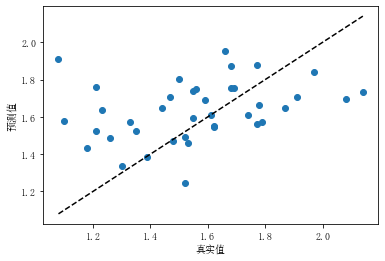

In [341]:
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.scatter(y_kept_test, y_pred)
plt.plot([y_kept_test.min(),y_kept_test.max()], [y_kept_test.min(),y_kept_test.max()], 'k--')
plt.xlabel('真实值')
plt.ylabel('预测值')

In [ ]:
###Modeling directly use raw data does not work